api doc : https://www.coingecko.com/api/documentations/v3

In [1]:
import numpy as np
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import time
import datetime
import pandas as pd
from pathlib import Path
import os

from statsmodels.tsa.stattools import adfuller #Augmented Dickey-Fuller test
import matplotlib.pyplot as plot

url = 'https://api.coingecko.com/api/v3/coins/bitcoin/history'
parameters = {
  'date':'12-11-2020'
}

session = Session()

url = 'https://api.coingecko.com/api/v3/coins/bitcoin/history'
parameters = {
  'date':'12-11-2020',
  'localization' : False
}

session = Session()


https://api.coingecko.com/api/v3/coins/bitcoin/market_chart/range?vs_currency=usd&from=1604188800&to=1605283978
endpoint pour une fourchette de date

In [2]:
start_date = "20/11/2020"
end_date = "25/11/2020"
start_timestamp = int(time.mktime(datetime.datetime.strptime(start_date, "%d/%m/%Y").timetuple()))
end_timestamp  = int(time.mktime(datetime.datetime.strptime(end_date, "%d/%m/%Y").timetuple()))

print(start_timestamp, end_timestamp)

1605826800 1606258800


In [3]:
currency="bitcoin"
url = 'https://api.coingecko.com/api/v3/coins/'+currency+'/market_chart/range?'
parameters = {
    'vs_currency':'usd',
    'from':start_timestamp,
    'to':end_timestamp
}

session = Session()

try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
    mypath = os.path.abspath('')
    path_to_save = str(mypath) + '/../data/'
    df = pd.DataFrame(data["prices"])
    file_name = "data.csv"
    df.to_csv(os.path.join(path_to_save, file_name))
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [4]:
csv_file_name = '../data/data.csv' #please put the name of the csv file you want to read
data = pd.read_csv(csv_file_name, index_col=[0],sep=',', encoding="utf-8")
data.iloc[:49] # we display the first 50 rows

,0,1
0,1605827332571,17878.504943
1,1605831039446,17822.996753
2,1605834375784,17775.271933
3,1605838402527,17940.763174
4,1605842903104,17987.234295
5,1605846666714,18062.911797
6,1605849535958,18093.137004
7,1605852364131,18107.869314
8,1605857040889,18302.129182
9,1605859568092,18203.654857


In [5]:
data.columns = ['time', 'price']

In [6]:
data['time'] = data['time'].astype(str).str[:-3].astype(np.int64)

In [7]:
data

,time,price
0,1605827332,17878.504943
1,1605831039,17822.996753
2,1605834375,17775.271933
3,1605838402,17940.763174
4,1605842903,17987.234295
...,...,...
115,1606241189,19135.703235
116,1606245256,19192.871932
117,1606249215,19139.487099
118,1606252332,19017.571635


In [8]:
data['time'] = pd.to_datetime(data['time'], unit='s')

In [9]:
data

,time,price
0,2020-11-19 23:08:52,17878.504943
1,2020-11-20 00:10:39,17822.996753
2,2020-11-20 01:06:15,17775.271933
3,2020-11-20 02:13:22,17940.763174
4,2020-11-20 03:28:23,17987.234295
...,...,...
115,2020-11-24 18:06:29,19135.703235
116,2020-11-24 19:14:16,19192.871932
117,2020-11-24 20:20:15,19139.487099
118,2020-11-24 21:12:12,19017.571635


In [10]:
data = data.set_index('time')

In [11]:
def ADFtest(serie):
    val = serie.values
    result = adfuller(val)
    print('ADF Statistic: ' + str(result[0])) # the more negative, the more we reject null hypothesis = stationnary
    print('p-value: ' + str(result[1])) # p<0.05 => reject null hypothesis = stationnary



In [12]:
def plotting(serie, title):
    plot.figure(figsize=(15,5))
    plot.plot(serie)
    plot.xlabel('Date', fontsize=12)
    plot.ylabel('Price in USD', fontsize=12)
    plot.title(title, fontsize=15)
    plot.show()

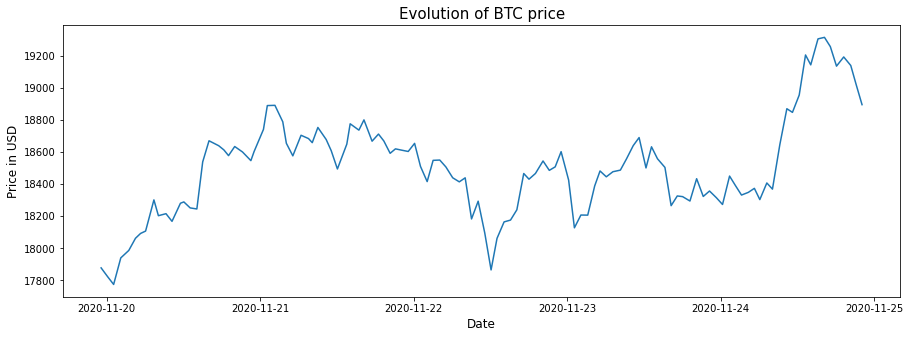

In [13]:
plotting(data, "Evolution of BTC price")

In [14]:
ADFtest(data)

ADF Statistic: -2.3372632719105164
p-value: 0.16023123919484022


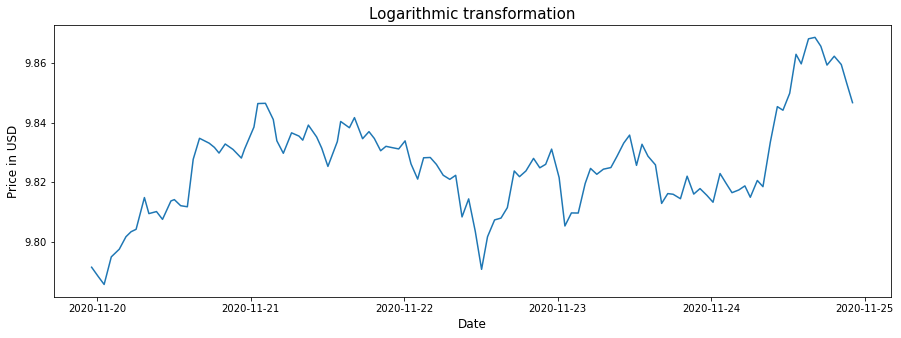

In [15]:
logTransformed = np.log(data)
plotting(logTransformed,"Logarithmic transformation")
    

In [ ]:
logDiffTransformed = logTransformed - logTransformed.shift()
plotting(logTransformed,"Logarithmic transformation")